In [1]:
#1. Data Description
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   age     sex     bmi  children smoker      charges
0   19  female  27.900         0    yes  16884.92400
1   18    male  33.770         1     no   1725.55230
2   28    male  33.000         3     no   4449.46200
3   33    male  22.705         0     no  21984.47061
4   32    male  28.880         0     no   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64


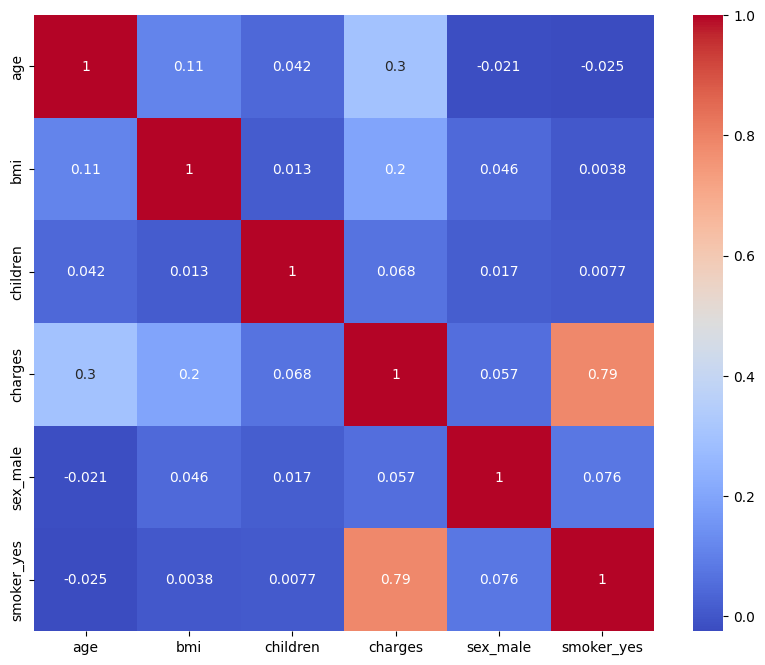

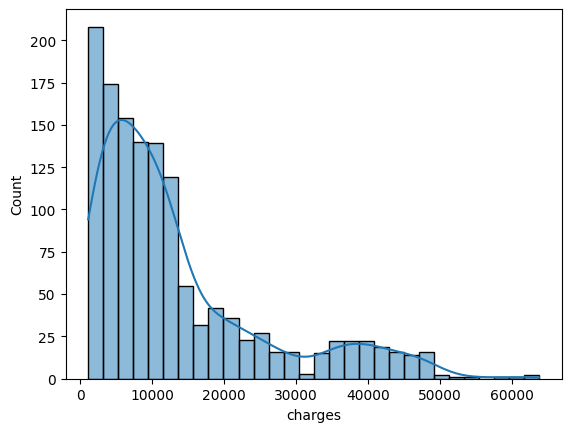

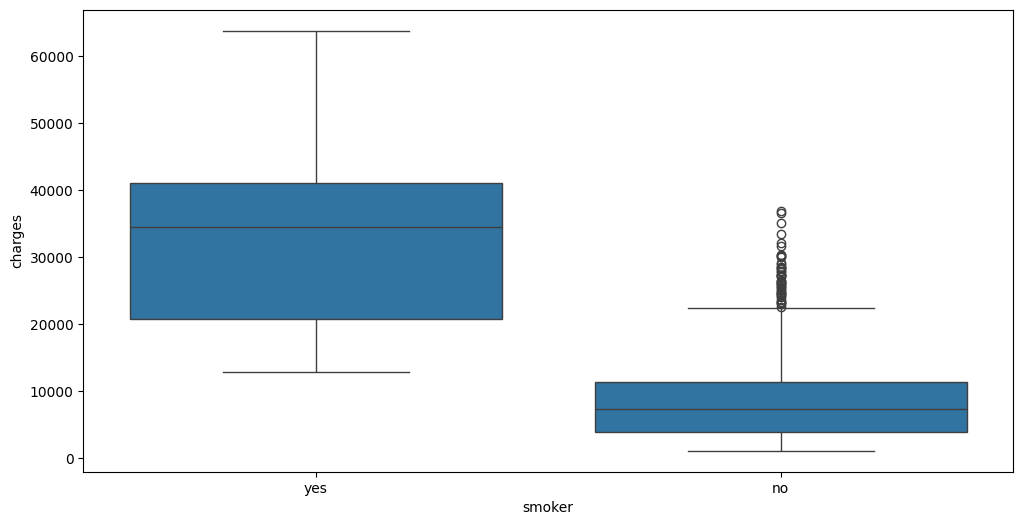

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode categorical variables for EDA
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Pairplot to visualize relationships
# sns.pairplot(df_encoded)
# plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of target variable
sns.histplot(df['charges'], kde=True)
plt.show()

# Boxplot for categorical variables vs. charges
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

# Split the data
X = df.drop('charges', axis=1)
y = df['charges']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr = LinearRegression()
svr = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()


In [12]:
# Train models
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from tabulate import tabulate

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Evaluate each model
models = [lr, svr, dt, rf]
model_names = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest']

# Store results in a list of dictionaries
results = []

for model, name in zip(models, model_names):
    mae, mse, r2 = evaluate_model(model, X_test, y_test)
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R²': r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table with borders
table = tabulate(results_df, headers='keys', tablefmt='grid')
print(table)


+----+-------------------+---------+-------------+------------+
|    | Model             |     MAE |         MSE |         R² |
+====+===================+=========+=============+============+
|  0 | Linear Regression | 4213.48 | 3.39793e+07 |  0.78113   |
+----+-------------------+---------+-------------+------------+
|  1 | SVR               | 8597.35 | 1.66235e+08 | -0.0707653 |
+----+-------------------+---------+-------------+------------+
|  2 | Decision Tree     | 3175.98 | 4.67887e+07 |  0.698621  |
+----+-------------------+---------+-------------+------------+
|  3 | Random Forest     | 2540.1  | 2.19508e+07 |  0.858609  |
+----+-------------------+---------+-------------+------------+


In [18]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
mae, mse, r2 = evaluate_model(best_rf, X_test, y_test)
print(f"Best Random Forest - MAE: {mae}, MSE: {mse}, R²: {r2}")


{'max_depth': 10, 'n_estimators': 100}
Best Random Forest - MAE: 2489.7934179191907, MSE: 21582864.591085102, R²: 0.8609788023148597


In [19]:
import pickle

# Save the best model
with open('insurance_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
